In [1]:
#!/usr/bin/env python3

"""
Implementation of the Temporal Inversion using COmbination of displacements with Interpolation (TICOI) method for one pixel.
Author: Laurane Charrier
Reference:
    Charrier, L., Yan, Y., Koeniguer, E. C., Leinss, S., & Trouvé, E. (2021). Extraction of velocity time series with an optimal temporal sampling from displacement observation networks. IEEE Transactions on Geoscience and Remote Sensing.
    Charrier, L., Yan, Y., Colin Koeniguer, E., Mouginot, J., Millan, R., & Trouvé, E. (2022). Fusion of multi-temporal and multi-sensor ice velocity observations.ISPRS annals of the photogrammetry, remote sensing and spatial information sciences, 3, 311-318.
"""

import os
from ticoi.core import ticoi_one_pixel

In [2]:
cube_name = f'{os.path.abspath(os.path.join(os.getcwd(), "..", "test_data"))}/ITS_LIVE_Lowell_Lower_test.nc'
path_save = f'{os.path.abspath(os.path.join(os.getcwd(), "..", "examples", "results", "pixel"))}/'

i, j = -138.18069, 60.29076  # coordinate in pixel
pick_dates = ["2015-01-01", "2024-01-01"]

In [10]:
## --------------------------- Main parameters ----------------------------- ##
# For the following part we advice the user to change only the following parameter, the other parameters stored in a dictionary can be kept as it is for a first use
coef = 100  # Regularization coefficient.s to be used (for each flag if flags is not None)
delete_outliers = {"median_angle": 45}
result_quality = [
    "Error_propagation",
    "X_contribution",
]  # Criterium used to evaluate the quality of the results


In [11]:
## ----------------------- Visualization parameters ------------------------ ##
verbose = False  # Print information throughout TICOI processing
save = False  # Save the results and figures
show = True  # Plot some figures
option_visual = ["obs_magnitude", "invertvv_overlaid", "quality_metrics"]

[Data loading] Dask chunk size:
[Data loading] Chunk shape: (4836,23,12)
[Data loading] Chunk size: 5338944 (5.3MB)
[Data loading] Dask chunk size:
[Data loading] Chunk shape: (4590,23,12)
[Data loading] Chunk size: 5067360 (5.1MB)


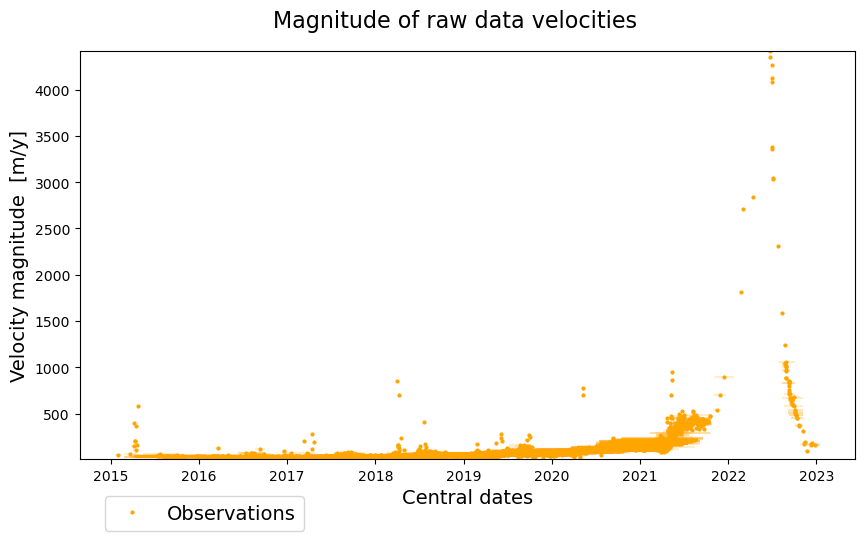

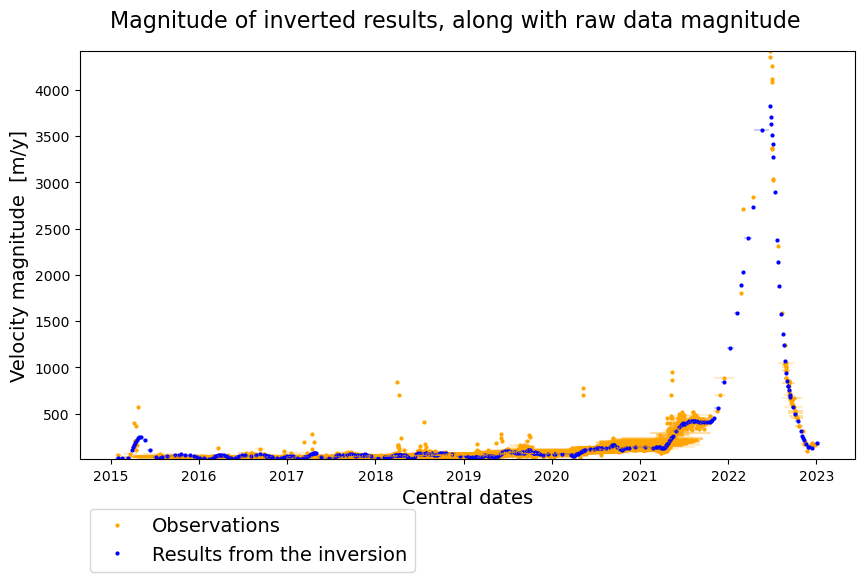

quality_metrics is not a valid option for visualization


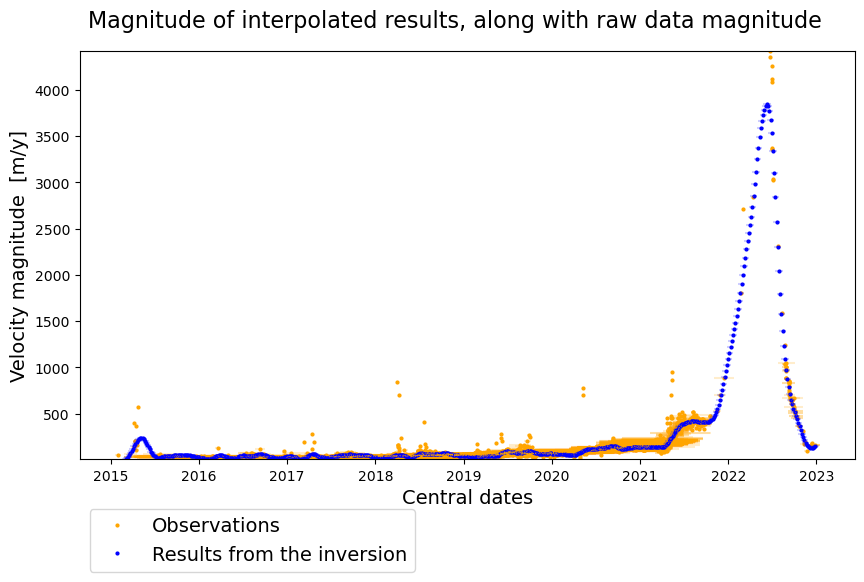

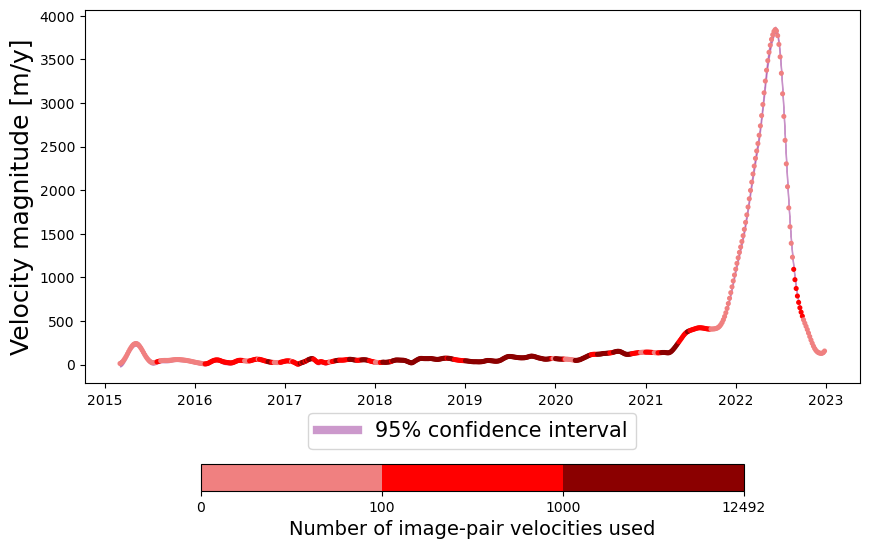

In [12]:
data,dataf,dataf_lp = ticoi_one_pixel(cube_name=cube_name,i=i,j=j,save=save,path_save=path_save,show=show,option_visual=option_visual,verbose=verbose,load_kwargs={"pick_date":pick_dates,"buffer": [i, j, 0.1]},load_pixel_kwargs={"visual":show},preData_kwargs={"delete_outliers":delete_outliers},inversion_kwargs = {"coef":coef,"result_quality":result_quality,"visual":show},interpolation_kwargs = {"result_quality":result_quality})